In [1]:
# Import necessary libraries
import cv2      # OpenCV library for image processing
import numpy as np  # NumPy for array/matrix operations
import matplotlib.pyplot as plt  # For displaying images inside the notebook
from PIL import Image
from IPython.display import display
import torch
from torchvision import transforms

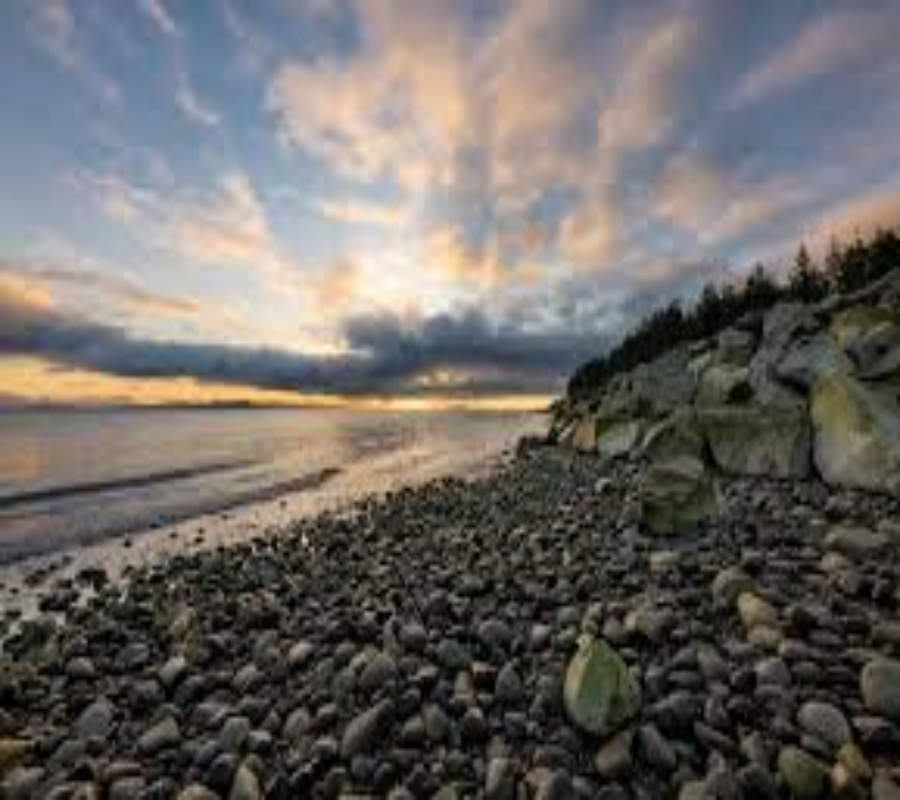

In [2]:
# Load the image
img = Image.open(r"Images\size.png")

# Display inside notebook
display(img)

In [4]:
import cv2

# Read your real image
image = cv2.imread(r"Images\size.png")  

# Resize to smaller dimensions 
resized_image = cv2.resize(image, (300, 300))

# Save the resized result
cv2.imwrite("RESULT/resized_myphoto.jpg", resized_image)

print("✅ Resized image saved: resized_myphoto.jpg")


✅ Resized image saved: resized_myphoto.jpg


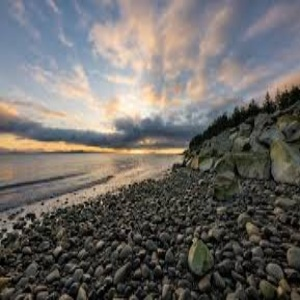

In [5]:
# Load the image
img = Image.open(r"RESULT\resized_myphoto.jpg")

# Display inside notebook
display(img)


🎨 Available Filters:
1: Grayscale
2: Sepia
3: Sharpen
4: Cartoon
5: Edge Detection
6: Blur
7: Invert Colors
8: Brightness/Contrast
9: Pencil Sketch
10: Emboss
11: Color Shift


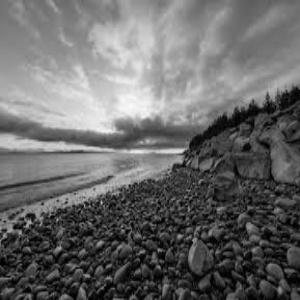

✅ filtered image saved: filtered_myphoto.jpg


In [8]:

# ---------- Filters ----------
def apply_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def apply_sepia(img):
    kernel = np.array([[0.272, 0.534, 0.131],
                       [0.349, 0.686, 0.168],
                       [0.393, 0.769, 0.189]])
    return cv2.transform(img, kernel)

def apply_sharpen(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

def apply_cartoon(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(img, 9, 250, 250)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

def apply_edge_detection(img):
    return cv2.Canny(img, 100, 200)

def apply_blur(img):
    return cv2.GaussianBlur(img, (15, 15), 0)

def apply_invert(img):
    return cv2.bitwise_not(img)

def apply_brightness_contrast(img, brightness=30, contrast=30):
    return cv2.convertScaleAbs(img, alpha=1 + contrast/100, beta=brightness)

def apply_pencil_sketch(img):
    gray, sketch = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
    return sketch

def apply_emboss(img):
    kernel = np.array([[ -2, -1, 0],
                       [ -1,  1, 1],
                       [  0,  1, 2]])
    return cv2.filter2D(img, -1, kernel)

def apply_color_shift(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 50) % 180
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# ---------- Load Image ----------
img_path = r"RESULT\resized_myphoto.jpg"  
image = cv2.imread(img_path)

# ---------- Print Filter List ----------
filters_list = {
    "1": "Grayscale",
    "2": "Sepia",
    "3": "Sharpen",
    "4": "Cartoon",
    "5": "Edge Detection",
    "6": "Blur",
    "7": "Invert Colors",
    "8": "Brightness/Contrast",
    "9": "Pencil Sketch",
    "10": "Emboss",
    "11": "Color Shift"
}

print("\n🎨 Available Filters:")
for num, name in filters_list.items():
    print(f"{num}: {name}")

# ---------- Choose filter ----------
choice = input("\nEnter filter number: ")

if choice == "1":
    result = apply_grayscale(image)
elif choice == "2":
    result = apply_sepia(image)
elif choice == "3":
    result = apply_sharpen(image)
elif choice == "4":
    result = apply_cartoon(image)
elif choice == "5":
    result = apply_edge_detection(image)
elif choice == "6":
    result = apply_blur(image)
elif choice == "7":
    result = apply_invert(image)
elif choice == "8":
    result = apply_brightness_contrast(image)
elif choice == "9":
    result = apply_pencil_sketch(image)
elif choice == "10":
    result = apply_emboss(image)
elif choice == "11":
    result = apply_color_shift(image)
else:
    print("❌ Invalid choice!")
    exit()

# ---------- Ensure same size as original ----------
if len(result.shape) == 2:  # Grayscale or Sketch
    result = cv2.resize(result, (image.shape[1], image.shape[0]))
else:
    result = cv2.resize(result, (image.shape[1], image.shape[0]))

# ---------- Show Result in Notebook ----------
if len(result.shape) == 2:  # Grayscale or Sketch
    result_pil = Image.fromarray(result)
else:
    result_pil = Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

display(result_pil)

# ---------- Save ----------
cv2.imwrite("RESULT/filtered_myphoto.jpg", result)
print("✅ filtered image saved: filtered_myphoto.jpg")

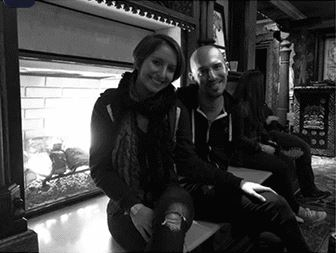

In [9]:
# Load the image
img = Image.open(r"Images\3.png")

# Display inside notebook
display(img)

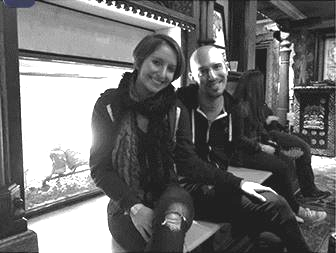

✅ Contrast adjusted image saved: contrast_myphoto.jpg


In [10]:
# ---------- Load Image ----------
img_path = r"Images\3.png"
image = cv2.imread(img_path)

# ---------- Adjust Contrast & Brightness ----------
# brightness: -100 to 100, contrast: -100 to 100
def adjust_contrast_brightness(img, contrast=30, brightness=30):
    alpha = 1 + (contrast / 100.0)   # Simple contrast control
    beta = brightness                # Simple brightness control
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Example usage
result = adjust_contrast_brightness(image, contrast=50, brightness=25)

# ---------- Show Result in Notebook ----------
result_pil = Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
display(result_pil)

# ---------- Save ----------
cv2.imwrite("RESULT/contrast_myphoto.jpg", result)
print("✅ Contrast adjusted image saved: contrast_myphoto.jpg")

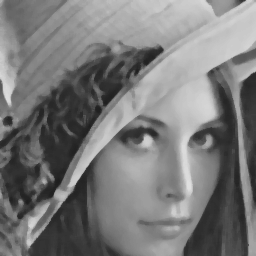

In [11]:
# Load the image
img = Image.open(r"Images\1.png")

# Display inside notebook
display(img)

🖼 Choose editing option:
1: Rotate only
2: Flip only
3: Crop only
4: Rotate + Crop
5: Rotate + Flip
6: Flip + Crop
7: Rotate + Flip + Crop

🔄 Rotate Selected
✅ Rotated by 180.0 degrees

↔ Flip Selected
Flip options: 0=vertical, 1=horizontal, -1=both
✅ Flip applied

✂ Crop Selected
Image shape: height=256, width=256
✅ Crop applied


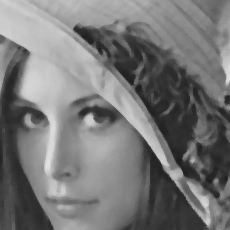

✅ Edited image saved: edited_myphoto.jpg


In [13]:
import cv2
from PIL import Image
from IPython.display import display

# ---------- Load Image ----------
img_path = r"Images\1.png"
image = cv2.imread(img_path)
result = image.copy()

# ---------- Print Options ----------
print("🖼 Choose editing option:")
options = {
    "1": "Rotate only",
    "2": "Flip only",
    "3": "Crop only",
    "4": "Rotate + Crop",
    "5": "Rotate + Flip",
    "6": "Flip + Crop",
    "7": "Rotate + Flip + Crop"
}

for key, val in options.items():
    print(f"{key}: {val}")

choice = input("Enter option number: ")

# ---------- Apply Selected Option ----------
# Rotate
if choice in ["1","4","5","7"]:
    print("\n🔄 Rotate Selected")
    angle = float(input("Enter rotation angle in degrees (positive=clockwise): "))
    (h, w) = result.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    result = cv2.warpAffine(result, M, (w, h))
    print(f"✅ Rotated by {angle} degrees")

# Flip
if choice in ["2","5","6","7"]:
    print("\n↔ Flip Selected")
    print("Flip options: 0=vertical, 1=horizontal, -1=both")
    flip_code = int(input("Enter flip code: "))
    result = cv2.flip(result, flip_code)
    print("✅ Flip applied")

# Crop
if choice in ["3","4","6","7"]:
    print("\n✂ Crop Selected")
    height, width = result.shape[:2]
    print(f"Image shape: height={height}, width={width}")

    # loop to ensure valid input
    while True:
        row_start = int(input(f"Enter row start (0 to {height-1}): "))
        row_end   = int(input(f"Enter row end ({row_start+1} to {height}): "))
        col_start = int(input(f"Enter col start (0 to {width-1}): "))
        col_end   = int(input(f"Enter col end ({col_start+1} to {width}): "))

        if 0 <= row_start < row_end <= height and 0 <= col_start < col_end <= width:
            break
        else:
            print("❌ Invalid numbers! Please enter values within image bounds.")

    result = result[row_start:row_end, col_start:col_end]
    print("✅ Crop applied")

# ---------- Show Result ----------
display(Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)))

# ---------- Save ----------
cv2.imwrite("RESULT/edited_myphoto.jpg", result)
print("✅ Edited image saved: edited_myphoto.jpg")

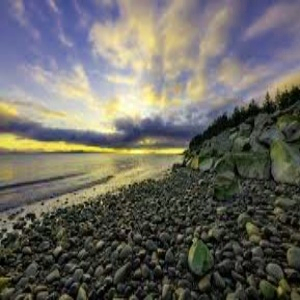

True

In [14]:
# Load image
img = cv2.imread(r"RESULT\resized_myphoto.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Adjust Hue and Saturation
hue_shift = 10           # change hue by +10
saturation_scale = 1.3   # increase saturation by 30%

img_hsv[:, :, 0] = (img_hsv[:, :, 0] + hue_shift) % 180
img_hsv[:, :, 1] = np.clip(img_hsv[:, :, 1] * saturation_scale, 0, 255)

# Convert back to BGR
img_result = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/adjusted_hue_saturation.jpg", img_result)

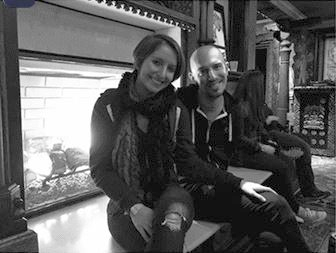

True

In [15]:
# Load image
img = cv2.imread(r"Images\3.png")

gamma = 1.5  # >1 brightens, <1 darkens
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")

img_result = cv2.LUT(img, table)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/gamma_corrected.jpg", img_result)

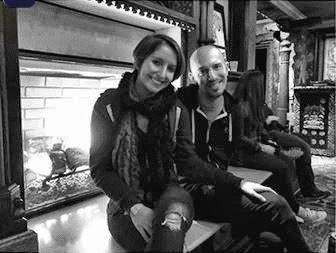

✅ CLAHE applied on color image and saved


In [16]:

# Load image
img = cv2.imread(r"Images\3.png")

# Split the channels
b, g, r = cv2.split(img)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE to each channel
b_clahe = clahe.apply(b)
g_clahe = clahe.apply(g)
r_clahe = clahe.apply(r)

# Merge channels back
img_clahe = cv2.merge([b_clahe, g_clahe, r_clahe])

# Display in notebook
display(Image.fromarray(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/clahe_color_result.jpg", img_clahe)
print("✅ CLAHE applied on color image and saved")

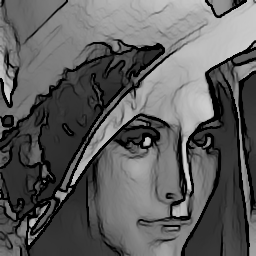

✅ Oil painting-like effect applied


In [17]:
import cv2
from PIL import Image
from IPython.display import display

# Load image
img = cv2.imread(r"Images\1.png")

# Apply Oil Painting-like effect using stylization
oil_like = cv2.stylization(img, sigma_s=10, sigma_r=0.3)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(oil_like, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/oil_like.jpg", oil_like)
print("✅ Oil painting-like effect applied")

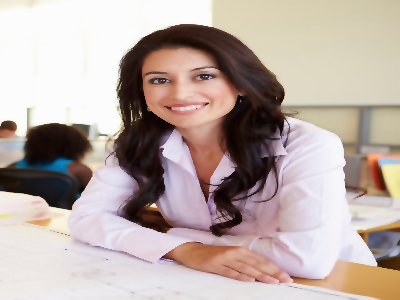

✅ Watercolor effect applied


In [18]:
import cv2
from PIL import Image
from IPython.display import display

# Load image
img = cv2.imread(r"Images\2.png")

# Apply bilateral filter multiple times for watercolor effect
watercolor = cv2.bilateralFilter(img, 2, 70, 70)
for i in range(2):
    watercolor = cv2.bilateralFilter(watercolor, 2, 70, 70)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(watercolor, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/watercolor.jpg", watercolor)
print("✅ Watercolor effect applied")

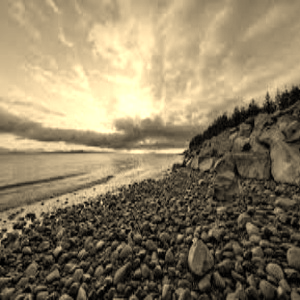

✅ Vintage effect applied


In [19]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Load image
img = cv2.imread(r"RESULT\resized_myphoto.jpg")

# Create a sepia kernel
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
vintage = cv2.transform(img, sepia_kernel)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(vintage, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/vintage.jpg", vintage)
print("✅ Vintage effect applied")

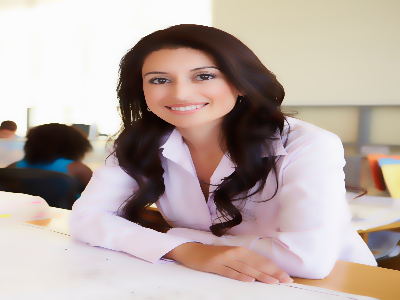

✅ Face beautification applied


In [20]:
import cv2
from PIL import Image
from IPython.display import display

# Load image
img = cv2.imread(r"Images\2.png")

# Convert to YCrCb color space (better for skin smoothing)
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(img_ycrcb)

# Apply bilateral filter on the Y channel (luminance) for smoothing
y_filtered = cv2.bilateralFilter(y, d=10, sigmaColor=30, sigmaSpace=30)

# Merge channels back
img_smooth = cv2.merge([y_filtered, cr, cb])
img_smooth = cv2.cvtColor(img_smooth, cv2.COLOR_YCrCb2BGR)

# Display in notebook
display(Image.fromarray(cv2.cvtColor(img_smooth, cv2.COLOR_BGR2RGB)))

# Save
cv2.imwrite("RESULT/face_beautified.jpg", img_smooth)
print("✅ Face beautification applied")

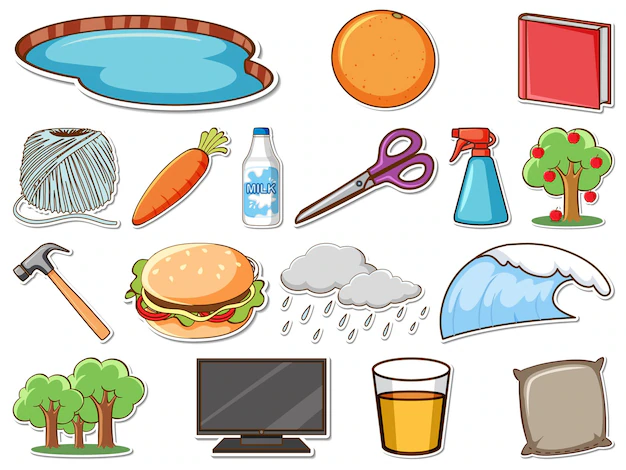

In [8]:
# Load the image
img = Image.open(r"Images\4.png")

# Display inside notebook
display(img)

Draw on the image to mark areas to remove. Press 's' to apply inpainting, 'q' to quit.
✅ Object removed and saved at RESULT\object_removed.png
✅ Object removed and saved at RESULT\object_removed.png


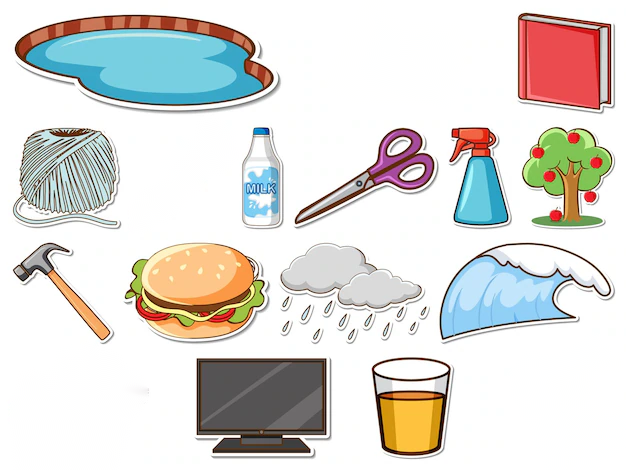

In [7]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import os


# ---------- Load image ----------
img_path = r"Images\4.png"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy = img.copy()

# ---------- Mouse callback ----------
drawing = False
mask = np.zeros(img.shape[:2], dtype=np.uint8)

def draw_mask(event, x, y, flags, param):
    global drawing, mask, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(mask, (x, y), 10, 255, -1)
        cv2.circle(img_copy, (x, y), 10, (255,0,0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("Draw Mask")
cv2.setMouseCallback("Draw Mask", draw_mask)

print("Draw on the image to mark areas to remove. Press 's' to apply inpainting, 'q' to quit.")

# --------- Prepare variable to store final result ---------
final_result = None

while True:
    cv2.imshow("Draw Mask", cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR))
    key = cv2.waitKey(1) & 0xFF
    if key == ord("s"):
        # Apply inpainting and show in OpenCV only
        inpainted = cv2.inpaint(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
        inpainted_rgb = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)
        cv2.imshow("Inpainted Result", cv2.cvtColor(inpainted_rgb, cv2.COLOR_RGB2BGR))
        # Save for later display in notebook
        final_result = inpainted_rgb
        # Save file
        result_path = os.path.join("RESULT", "object_removed.png")
        Image.fromarray(final_result).save(result_path)
        print(f"✅ Object removed and saved at {result_path}")
    elif key == ord("q"):
        break

cv2.destroyAllWindows()

# --------- Display final result in Notebook after quitting ---------
if final_result is not None:
    display(Image.fromarray(final_result))